In [1]:
import pandas as pd
import csv
from scipy.stats import pearsonr, spearmanr, ttest_ind
import numpy as np
import seaborn as sns; sns.set()

/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Q1 Self-regulated Learning questionnaire
goal_setting = [1, 2, 3, 4, 5]
environment_structuring = [6, 7, 8, 9]
task_strategies = [10, 11, 12, 13]
time_management = [14, 15, 16]
help_seeking = [17, 18, 19, 20]
self_evaluation = [21, 22, 23, 24]

# Q2 MSLQ Learning strategy
rehearsal = [25, 26, 27, 28]
elaboration = [29, 30, 31, 32, 33, 34]
organization = [35, 36, 37, 38]
critical_thinking = [39, 40, 41, 42, 43]

# self-regulated
metacognitive_selfregulation = [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Q3 Self-efficacy Questionnaire
math_self_efficacy = [56, 57, 58, 59, 60]
internet_self_efficacy = [61, 62, 63, 64]

reverse = [44, 51]

# cg: 控制組, eg1: 實驗組1, eg2: 實驗組2
cg = [1, 2, 3]
eg1 = [4, 6, 9, 10]
eg2 = [5, 7, 8, 11, 12]

group_list = ['cg', 'cg', 'cg', 'eg1', 'eg1', 'eg1', 'eg1', 'eg2', 'eg2', 'eg2', 'eg2', 'eg2']
# title_list = ['goal_setting', 'environment_structuring', 'task_strategies', 'time_management',
#              'help_seeking', 'self_evaluation', 'rehearsal', 'elaboration',
#              'organization', 'critical_thinking', 'metacognitive_selfregulation', 'math_self_efficacy',
#              'internet_self_efficacy']

title_list = ['goal_setting', 'environment_structuring', 'task_strategies', 'time_management',
             'help_seeking', 'self_evaluation']

In [3]:
def int_to_str(int_list):
    str_list = []
    for i in int_list:
        str_list.append(str(i))
    return str_list

# Load file

In [4]:

df_before = pd.DataFrame()
df_after = pd.DataFrame()
df_title = list(pd.read_csv('data/107-1-pre.csv'))

for class_num in range(1, 12 + 1):
    
    df_load = pd.read_csv('data/107-{}-pre.csv'.format(class_num))[df_title]
    df_load['group']=group_list[class_num-1]
    df_before = df_before.append(df_load, ignore_index=True)
    
    df_load = pd.read_csv('data/107-{}-post.csv'.format(class_num))[df_title]
    df_load['group']=group_list[class_num-1]
    df_after = df_after.append(df_load, ignore_index=True)

df_before = df_before.dropna()
df_after = df_after.dropna()


In [5]:
for title_name in title_list:

    df_before[title_name] = df_before[int_to_str(vars()[title_name])].mean(axis=1)
    df_after[title_name] = df_after[int_to_str(vars()[title_name])].mean(axis=1)
    

In [6]:
# remove invaild row
df_before = df_before.drop(df_before[(df_before[title_list[0]] >= 7) &
                                     (df_before[title_list[1]] >= 7) &
                                     (df_before[title_list[2]] >= 7) &
                                     (df_before[title_list[4]] >= 7)].index)

df_after = df_after.drop(df_after[(df_after[title_list[0]] >= 7) &
                                     (df_after[title_list[1]] >= 7) &
                                     (df_after[title_list[2]] >= 7) &
                                     (df_after[title_list[4]] >= 7)].index)

df_before = df_before.drop(df_before[(df_before[title_list[0]] == 1) &
                                     (df_before[title_list[1]] == 1) &
                                     (df_before[title_list[2]] == 1) &
                                     (df_before[title_list[4]] == 1)].index)

df_after = df_after.drop(df_after[(df_after[title_list[0]] == 1) &
                                     (df_after[title_list[1]] == 1) &
                                     (df_after[title_list[2]] == 1) &
                                     (df_after[title_list[4]] == 1)].index)

In [25]:
df_after

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,62,63,64,group,goal_setting,environment_structuring,task_strategies,time_management,help_seeking,self_evaluation
3,3,7.0,6.0,6.0,6.0,5.0,7.0,5.0,6.0,5.0,...,6.0,6.0,6.0,cg,6.0,5.75,5.75,6.333333,5.75,6.00
4,4,6.0,5.0,6.0,5.0,6.0,5.0,7.0,6.0,6.0,...,6.0,6.0,5.0,cg,5.6,6.00,4.00,4.333333,4.75,5.50
5,5,5.0,4.0,5.0,4.0,5.0,6.0,6.0,5.0,6.0,...,5.0,6.0,6.0,cg,4.6,5.75,4.25,3.666667,4.00,4.50
8,8,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,4.0,cg,5.0,4.75,4.50,4.666667,4.50,4.50
9,9,4.0,4.0,5.0,3.0,6.0,7.0,7.0,7.0,6.0,...,5.0,5.0,6.0,cg,4.4,6.75,2.50,3.666667,4.00,4.25
10,10,6.0,6.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,...,7.0,7.0,6.0,cg,6.4,7.00,6.75,6.333333,6.75,6.25
11,11,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,cg,6.0,6.00,5.25,5.333333,6.00,6.00
12,12,6.0,4.0,5.0,4.0,6.0,6.0,6.0,5.0,6.0,...,5.0,5.0,5.0,cg,5.0,5.75,5.25,4.666667,5.50,4.25
13,13,5.0,4.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,...,4.0,4.0,4.0,cg,4.6,5.50,4.00,4.666667,5.00,4.25
15,15,5.0,5.0,5.0,5.0,6.0,6.0,6.0,4.0,5.0,...,6.0,6.0,6.0,cg,5.2,5.25,5.00,4.666667,5.75,5.00


# Calculate mean difference

In [7]:
df_before_summary = df_before.groupby('group').mean()
df_after_summary = df_after.groupby('group').mean()

df_before_summary = df_before_summary[title_list]
df_after_summary = df_after_summary[title_list]

In [8]:
df_before_summary.T

group,cg,eg1,eg2
goal_setting,5.779747,5.089796,5.251852
environment_structuring,5.762658,5.357143,5.129630
task_strategies,4.598101,4.352041,4.453704
time_management,5.008439,4.571429,4.555556
help_seeking,5.575949,5.096939,5.092593
self_evaluation,5.196203,4.862245,4.879630


In [9]:
df_after_summary.T

group,cg,eg1,eg2
goal_setting,5.378788,5.186364,5.176471
environment_structuring,5.704545,5.409091,5.441176
task_strategies,4.651515,4.284091,4.661765
time_management,4.722222,4.484848,4.764706
help_seeking,5.257576,5.221591,4.764706
self_evaluation,5.238636,5.113636,4.911765


In [10]:
df_diff = df_after_summary.T - df_before_summary.T

In [11]:

df_before_std = pd.DataFrame()
df_before_std['cg'] = df_before[df_before['group']=='cg'].std()[title_list]
df_before_std['eg1'] = df_before[df_before['group']=='eg1'].std()[title_list]
df_before_std['eg2'] = df_before[df_before['group']=='eg2'].std()[title_list]
df_before_std
#.std()[title_list]

,cg,eg1,eg2
goal_setting,0.635364,0.792739,0.878097
environment_structuring,0.721575,0.748262,0.763879
task_strategies,0.713220,0.778818,0.820521
time_management,0.848956,0.819327,0.816497
help_seeking,0.783805,0.849044,0.814969
self_evaluation,0.869415,0.814998,0.767020


# Number of Samples

In [12]:
print(len(df_before[df_before['group']=='cg']),
     len(df_before[df_before['group']=='eg1']),
     len(df_before[df_before['group']=='eg2']))

79 49 27


# Claculate p-value

In [13]:
data = {'name': [], 'stats': [], 'p-value': [], 'group': []}


for group in set(group_list):
    for title_name in title_list:
        a = df_before[df_before['group']==group][title_name]
        b = df_after[df_after['group']==group][title_name]

        result = ttest_ind(a, b)

        data['name'].append(title_name)
        data['stats'].append(result[0])
        data['p-value'].append(result[1])
        data['group'].append(group)

df_result = pd.DataFrame(data)

In [14]:
data = {'name': [], 'stats': [], 'p-value': []}

for title_name in title_list:
    a = df_before[df_before['group']=='cg'][title_name]
    b = df_after[df_after['group']=='cg'][title_name]

    result = ttest_ind(a, b)

    data['name'].append(title_name)
    data['stats'].append(result[0])
    data['p-value'].append(result[1])
    
df_result = pd.DataFrame(data)

In [15]:
data = {'name': [], 'stats': [], 'p-value': []}

for title_name in title_list:
    a = df_before[df_before['group']=='cg'][title_name]
    b = df_after[df_after['group']=='eg1'][title_name]

    result = ttest_ind(a, b)

    data['name'].append(title_name)
    data['stats'].append(result[0])
    data['p-value'].append(result[1])
    
df_result = pd.DataFrame(data)
df_eg1 = df_result

In [16]:
data = {'name': [], 'stats': [], 'p-value': []}

for title_name in title_list:
    a = df_before[df_before['group']=='cg'][title_name]
    b = df_after[df_after['group']=='eg2'][title_name]

    result = ttest_ind(a, b)

    data['name'].append(title_name)
    data['stats'].append(result[0])
    data['p-value'].append(result[1])
    
df_result = pd.DataFrame(data)
df_eg2 = df_result

# Combine output

In [17]:
df_result_mean = pd.DataFrame(df_diff.stack(), columns=['Mean diff'])
df_result_std = pd.DataFrame(df_before_std.stack(), columns=['SD'])

df_temp=pd.DataFrame()
df_temp['eg1'] = df_eg1['p-value']
df_temp['eg2'] = df_eg2['p-value']
df_temp['cg'] = np.nan
df_temp['index'] = title_list
df_temp = df_temp.set_index('index')
df_result_p = df_temp[['cg', 'eg1', 'eg2']].stack()
df_result_p = pd.DataFrame(df_result_p, columns=['p-value'])

df_temp=pd.DataFrame()
df_temp['eg1'] = df_eg1['stats']
df_temp['eg2'] = df_eg2['stats']
df_temp['cg'] = np.nan
df_temp['index'] = title_list
df_temp = df_temp.set_index('index')
df_result_t = df_temp[['cg', 'eg1', 'eg2']].stack()
df_result_t = pd.DataFrame(df_result_t, columns=['t'])

df_temp = pd.DataFrame(np.nan, index=title_list, columns=set(group_list))
df_temp['cg'] = len(df_before[df_before['group']=='cg'])
df_temp['eg1'] = len(df_before[df_before['group']=='eg1'])
df_temp['eg2'] = len(df_before[df_before['group']=='eg2'])
df_result_n = df_temp[['cg', 'eg1', 'eg2']].stack()
df_result_n = pd.DataFrame(df_result_n, columns=['N'])

df_result = pd.concat([df_result_mean, df_result_n, df_result_std, df_result_t, df_result_p], axis=1)
df_result

Mean diff   N        SD         t   p-value
environment_structuring cg   -0.058113  79  0.721575       NaN       NaN
                        eg1   0.051948  49  0.748262  2.516543  0.013160
                        eg2   0.311547  27  0.763879  1.593047  0.114507
goal_setting            cg   -0.400959  79  0.635364       NaN       NaN
                        eg1   0.096568  49  0.792739  4.512843  0.000015
                        eg2  -0.075381  27  0.878097  3.284700  0.001435
help_seeking            cg   -0.318374  79  0.783805       NaN       NaN
                        eg1   0.124652  49  0.849044  2.270099  0.024971
                        eg2  -0.327887  27  0.814969  3.897297  0.000182
self_evaluation         cg    0.042434  79  0.869415       NaN       NaN
                        eg1   0.251391  49  0.814998  0.518706  0.604913
                        eg2   0.032135  27  0.767020  1.229969  0.221778
task_strategies         cg    0.053414  79  0.713220       NaN       NaN
                        eg1  -0.067950  49  0.778818  2.015497  0.046068
                        eg2   0.208061  27  0.820521 -0.324326  0.746412
time_management         cg   -0.286217  79  0.848956       NaN       NaN
                        eg1  -0.086580  49  0.819327  2.960136  0.003701
                        eg2   0.209150  27  0.816497  1.074045  0.285552

# Visualization

In [18]:
df_vis = df_before[title_list]

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
equ_tsne = tsne.fit_transform(df_vis)

/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
feature_tsne_df = pd.DataFrame(equ_tsne)

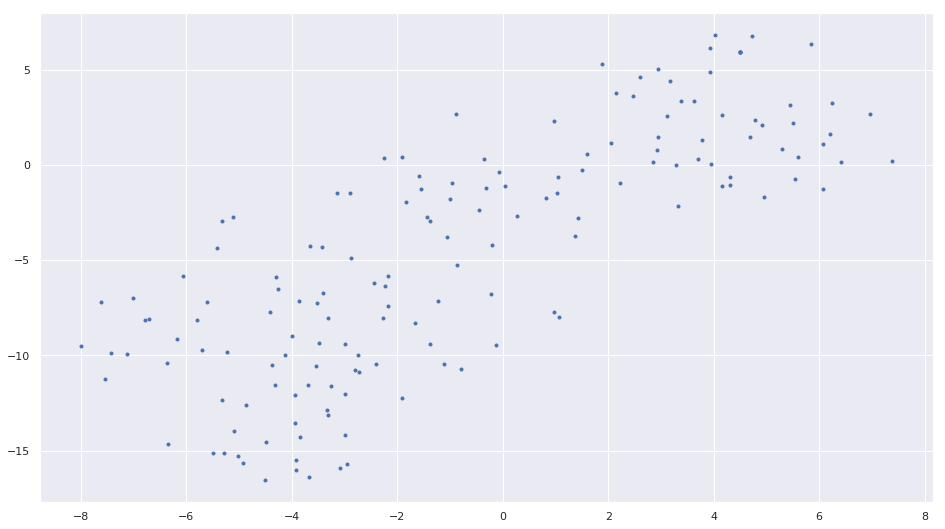

<Figure size 2160x1440 with 0 Axes>

In [20]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams.update({'font.size': 18})

# plot the result
vis_x = feature_tsne_df[0]
vis_y = feature_tsne_df[1]
plt.scatter(vis_x, vis_y, marker='.')
plt.figure(figsize=(30,20)) 
plt.show()

(1, 7)

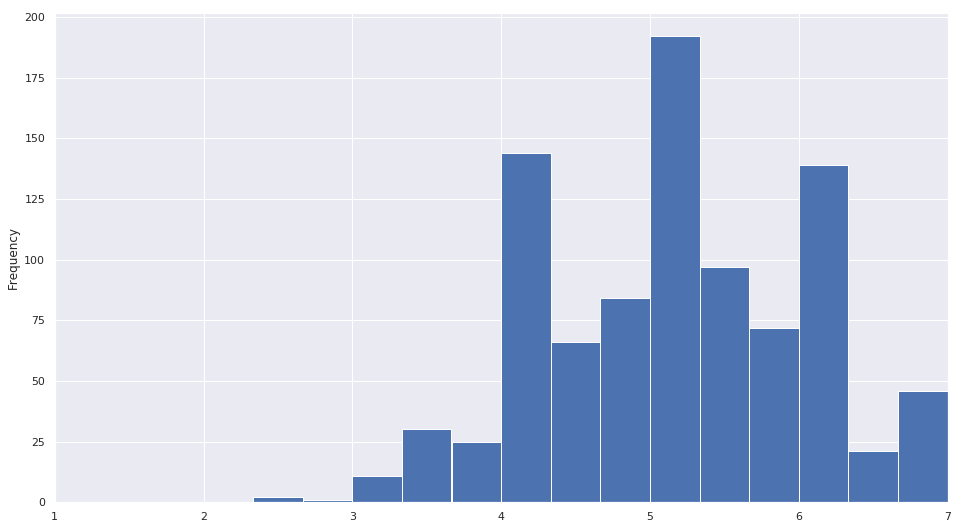

In [21]:
#df_before[title_list].plot.hist(stacked=True, bins=7)

ax_list = df_before[title_list].stack().plot.hist(stacked=True, bins=14)
ax_list.set_xlim((1, 7))

(1, 7)

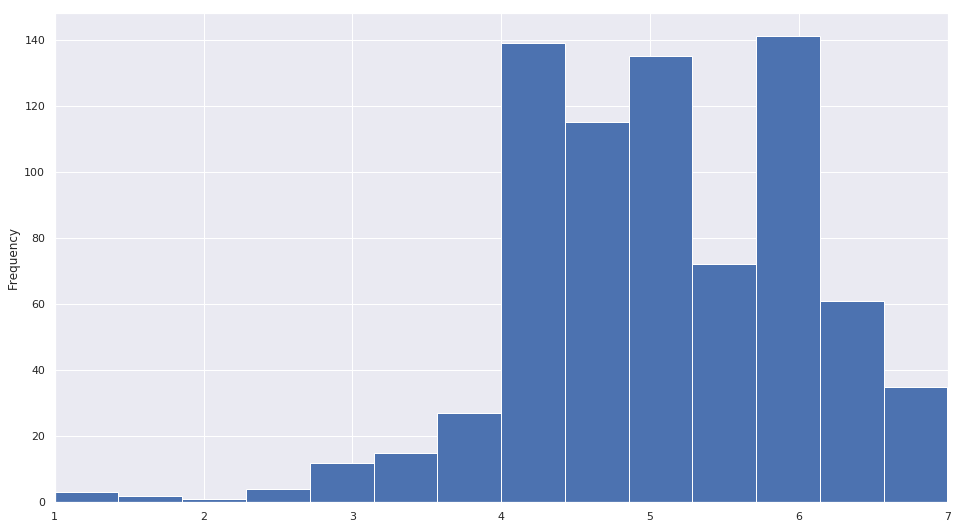

In [22]:
ax_list = df_after[title_list].stack().plot.hist(stacked=True, bins=14)
ax_list.set_xlim((1, 7))

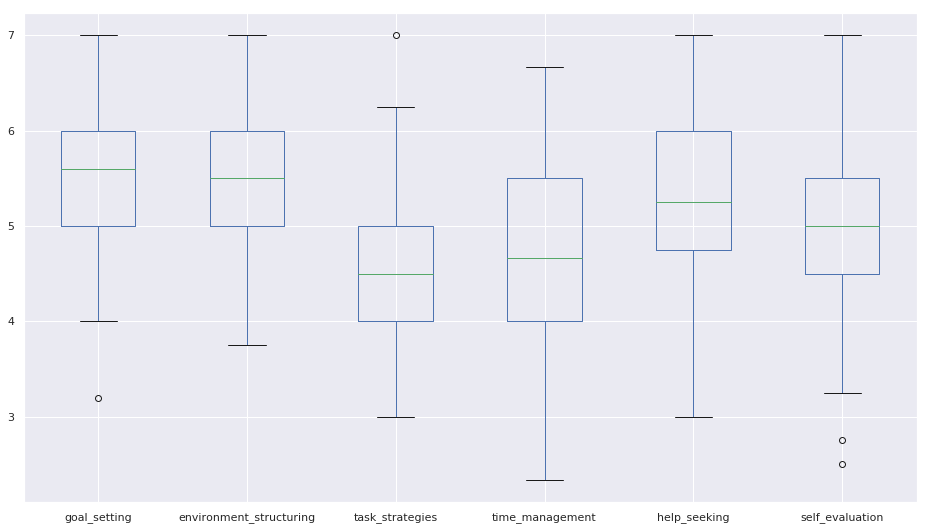

In [23]:
df_before[title_list].boxplot()

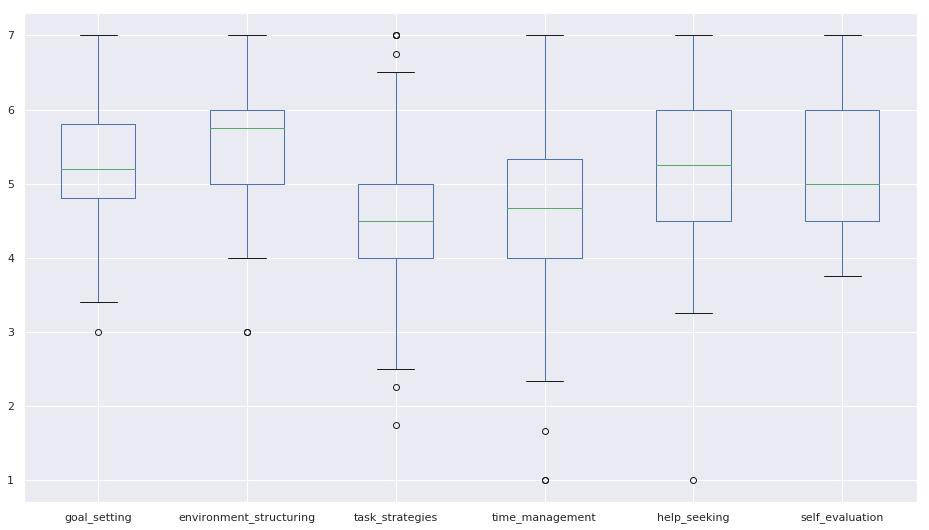

In [24]:
df_after[title_list].boxplot()